# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
unit = 'metric'

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | calama
Processing Record 3 of Set 1 | menongue
Processing Record 4 of Set 1 | buraydah
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | tinyahuarco
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | kalmunai
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | nakanojo
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | berea
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | dongsheng
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | pisco
Processing Record 23 of Set 1 | anit

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,14.45,87,85,10.92,NZ,1675717152
1,calama,-22.4667,-68.9333,20.27,45,75,9.77,CL,1675717225
2,menongue,-14.6585,17.6910,17.41,83,99,1.43,AO,1675717424
3,buraydah,26.3260,43.9750,16.25,36,100,3.54,SA,1675717163
4,bambous virieux,-20.3428,57.7575,27.14,78,75,3.60,MU,1675717158


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,14.45,87,85,10.92,NZ,1675717152
1,calama,-22.4667,-68.9333,20.27,45,75,9.77,CL,1675717225
2,menongue,-14.6585,17.6910,17.41,83,99,1.43,AO,1675717424
3,buraydah,26.3260,43.9750,16.25,36,100,3.54,SA,1675717163
4,bambous virieux,-20.3428,57.7575,27.14,78,75,3.60,MU,1675717158


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

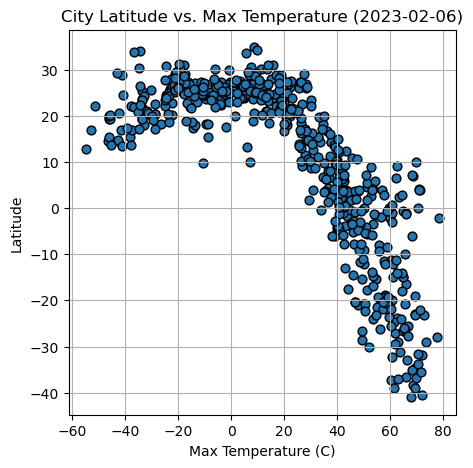

In [42]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(5,5), edgecolors= "black",
              title="City Latitude vs. Max Temperature (2023-02-06)", s=40)

# Incorporate the other graph properties
plt.xlabel('Max Temperature (C)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

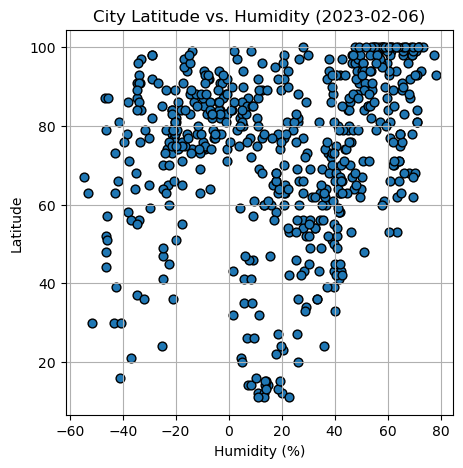

In [43]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(5,5), edgecolors= "black",
              title="City Latitude vs. Humidity (2023-02-06)", s=40)

# Incorporate the other graph properties
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

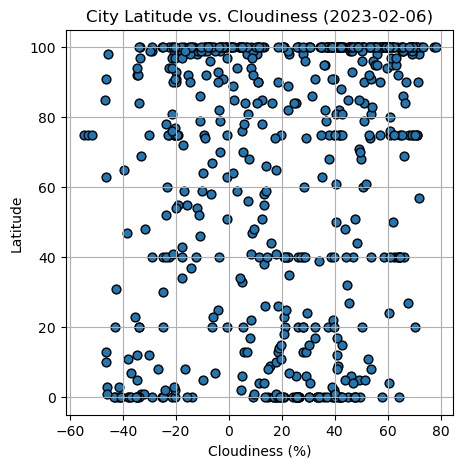

In [44]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(5,5), edgecolors= "black",
              title="City Latitude vs. Cloudiness (2023-02-06)", s=40)

# Incorporate the other graph properties
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

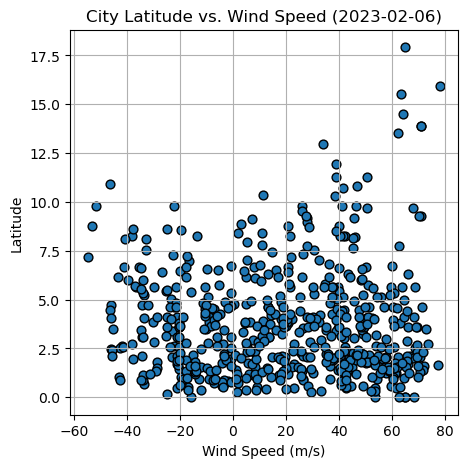

In [45]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(5,5), edgecolors= "black",
              title="City Latitude vs. Wind Speed (2023-02-06)", s=40)

# Incorporate the other graph properties
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [113]:
# Define a function to create Linear Regression plots
def regression(latitude, metric):
    x_values = latitude
    y_values = metric
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values) + 2, intercept + 2),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(str(metric.name))
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,buraydah,26.3260,43.9750,16.25,36,100,3.54,SA,1675717163
6,cabo san lucas,22.8909,-109.9124,26.95,53,35,0.45,MX,1675717206
8,nikolskoye,59.7035,30.7861,-2.06,96,94,1.57,RU,1675717425
9,kalmunai,7.4167,81.8167,24.51,87,56,2.91,LK,1675717425
11,nakanojo,36.5833,138.8500,4.40,60,100,1.60,JP,1675717426


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,14.45,87,85,10.92,NZ,1675717152
1,calama,-22.4667,-68.9333,20.27,45,75,9.77,CL,1675717225
2,menongue,-14.6585,17.6910,17.41,83,99,1.43,AO,1675717424
4,bambous virieux,-20.3428,57.7575,27.14,78,75,3.60,MU,1675717158
5,puerto ayora,-0.7393,-90.3518,29.98,74,51,6.71,EC,1675717424


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7477625310682255


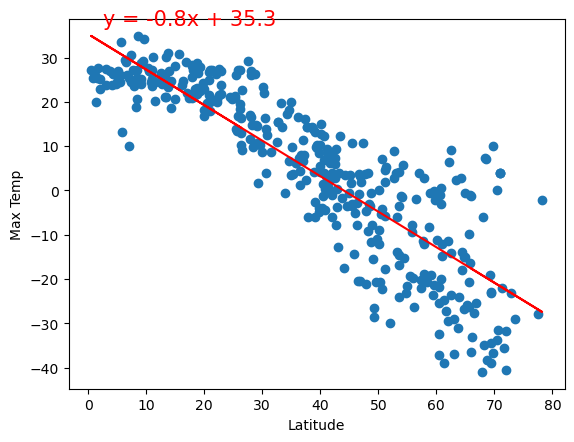

In [114]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-value is: 0.18004063256137748


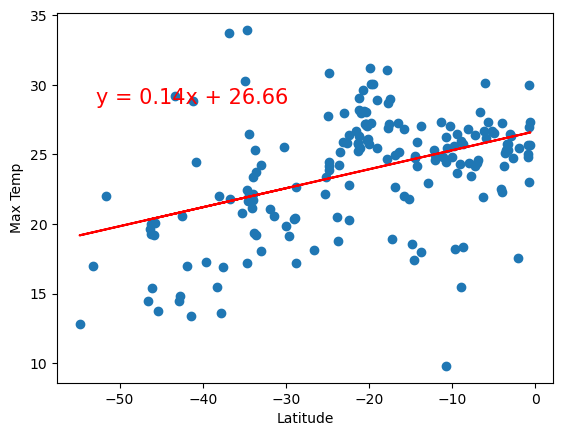

In [115]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20118167987124455


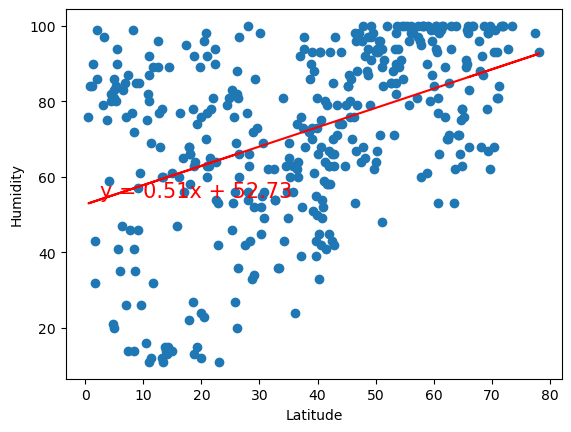

In [116]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-value is: 0.19637402632944684


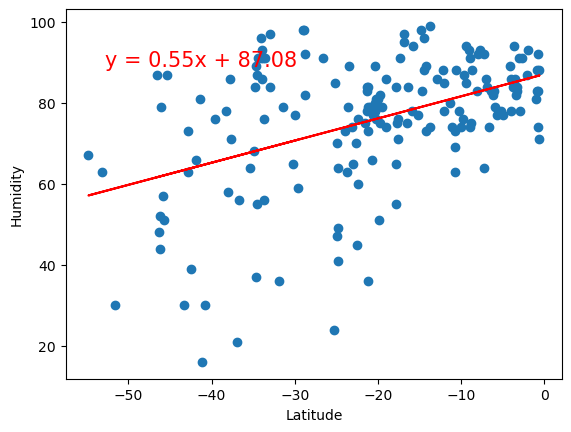

In [117]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05579516313135964


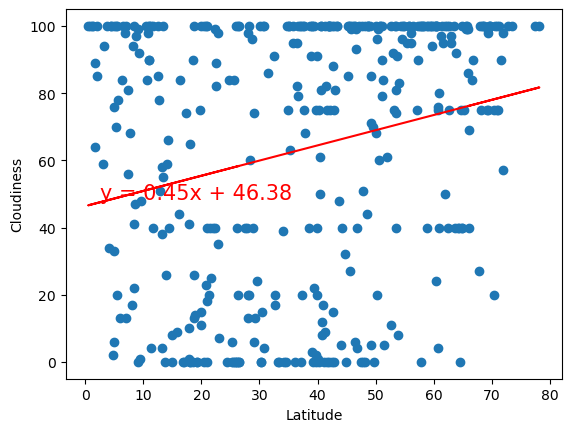

In [118]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.1770551624263586


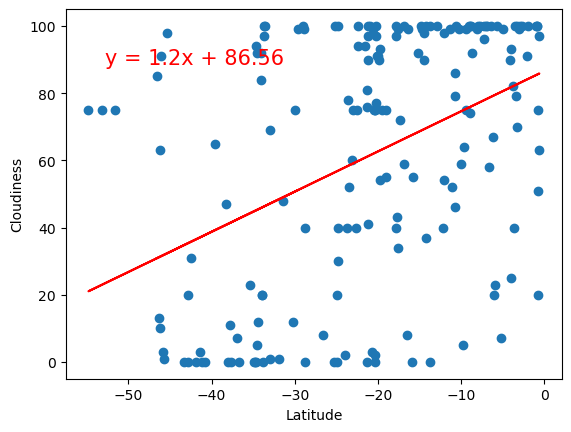

In [119]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0005083830373997848


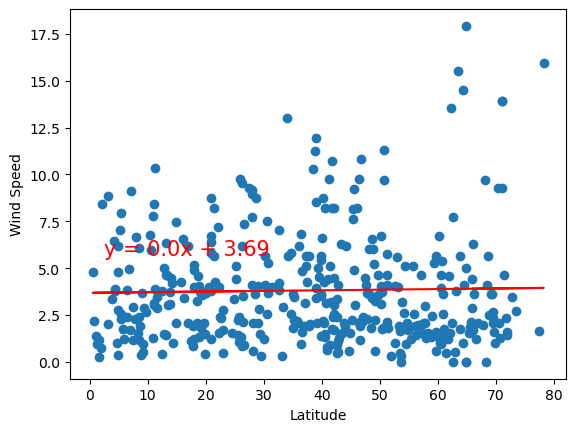

In [120]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: 0.09142975242817718


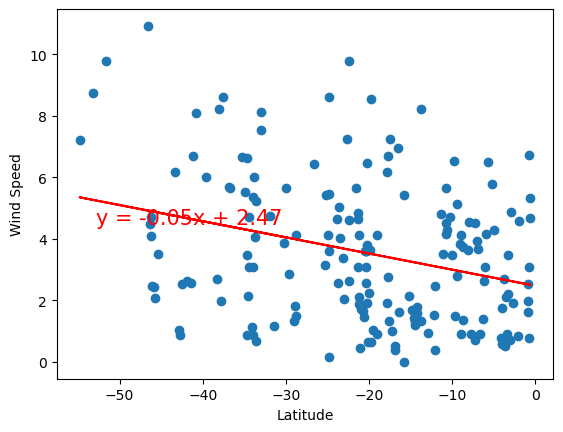

In [121]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE